# Project 1

## Q1.Compare the data to that country’s GDP

In [2]:
#This data shows military spending as percent of GDP for each country

#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


#Set some options
pd.set_option('display.notebook_repr_html', True)

#Note I precleaned the data in excel by removing the first few unneccesary rows

#Import the data, I am choosing to bring in one excel sheet that shows Military Spending for each country in current USD.
xls = pd.ExcelFile(r"SIPRI.xlsx")
                   
#Import share of GDP excel sheet
ShareofGDP = pd.read_excel(xls, 'Share of GDP')

# Drop all columns except: Country and 2012-2017
ShareofGDP = ShareofGDP.iloc[:, list(range(1)) + [-6] + [-5] + [-4] + [-3] + [-2] + [-1]]

#Drop all rows except: US, China, Russia, Germany, UK, France, Italy, Iran, Isreal, Saudi Arabia

#Select the rows I need by index
ShareofGDP = ShareofGDP.iloc[[71,92,150,160,173,159,164,177,179,185],:]

#sort by ascending so that the dataframe is in alphabetical order
ShareofGDP = ShareofGDP.sort_values(by='Country', ascending=True)

#Reindex so Country is the index- easier for plotting
ShareofGDP = ShareofGDP.set_index('Country')

#Multiply the dataframe by 100 to get an actual percentage
ShareofGDP = ShareofGDP*100

#shows everything with 2 decimalso it is easier to read the data frame
pd.set_option('display.precision', 3) 

ShareofGDP




,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,1.84,1.87,1.92,1.93,1.93,1.91
France,2.24,2.22,2.23,2.27,2.33,2.26
Germany,1.31,1.22,1.18,1.18,1.2,1.22
Iran,2.71,2.18,2.24,2.63,2.79,3.1
Israel,6.04,5.92,5.99,5.67,4.65,4.73
Italy,1.63,1.59,1.47,1.38,1.52,1.52
Russia,3.75,3.94,4.1,4.85,5.5,4.26
Saudi Arabia,7.7,9,10.7,13.5,9.91,10.3
UK,2.21,2.09,1.97,1.88,1.84,1.83


In [3]:
#Import military spending excel sheet 'Current USD' to later compare Military Spending and GDP
Militaryspending = pd.read_excel(xls, 'Current USD')

#Drop all columns except: Country and 2012-2017 (by index)
Militaryspending = Militaryspending.iloc[:, list(range(1)) + [-6] + [-5] + [-4] + [-3] + [-2] + [-1]]

#Drop all rows except: US, China, Russia, Germany, UK, France, Italy, Iran, Isreal, Saudi Arabia

#Create a list of the countries I need
Country = ("USA", "China", "Russia", "Germany", "UK", "France", "Italy", "Iran", "Israel", "Saudi Arabia")

#Select the Country column and select the Country list, return rows that contain the items in the Country list
Militaryspending = Militaryspending.loc[Militaryspending['Country'].isin(Country)]

#sort by ascending so that the dataframe is in alphabetical order
Militaryspending = Militaryspending.sort_values(by='Country', ascending=True)

#shows everything with 5 decimal(gets rid of numbers being shown in natural log)
pd.set_option('display.precision', 6) 

In [4]:
#I want to drop the US so I can clearly see the military spending in the smaller countries, I will look at this in question 2.

#Drop all rows except: China, Russia, Germany, UK, France, Italy, Iran, Isreal, Saudi Arabia

#I want to drop the US from this data frame so that it is easier to see what the data looks like without it. 

#Create a list of the countries I need

#Militaryspending.drop(Militaryspending.columns[0], axis=1, inplace=True)

Country = ("China", "Russia", "Germany", "UK", "France", "Italy", "Iran", "Israel", "Saudi Arabia")

#Select the Country column and select the Country list, return rows that contain the items in the Country list
MilitaryspendingnoUSA = Militaryspending.loc[Militaryspending['Country'].isin(Country)]

#sort by ascending so that the dataframe is in alphabetical order
MilitaryspendingnoUSA = MilitaryspendingnoUSA.sort_values(by='Country', ascending=True)

In [5]:
#Reindex so Country is the index- easier for plotting
Militaryspending = Militaryspending.set_index('Country')
MilitaryspendingnoUSA = MilitaryspendingnoUSA.set_index('Country')

In [6]:
#View the data frame
Militaryspending

,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,157390,179880,200772,214093,216031,228231
France,60035.2,62417.1,63613.6,55342.1,57358.4,57770.1
Germany,46470.9,45930.5,46102.7,39812.6,41579.5,44329.3
Iran,16494,11997.2,9901.11,10588.8,12264,14548.1
Israel,15545.7,17302.2,18481.1,16963.2,14782.8,16489
Italy,33732.8,33891.9,31572.4,25294.6,28205.8,29236.4
Russia,81469.4,88352.9,84696.5,66418.7,69245.3,66335
Saudi Arabia,56497.9,67020,80762.4,87185.9,63672.8,69413.3
UK,58495.7,56861.8,59182.9,53862.2,48118.9,47193.1


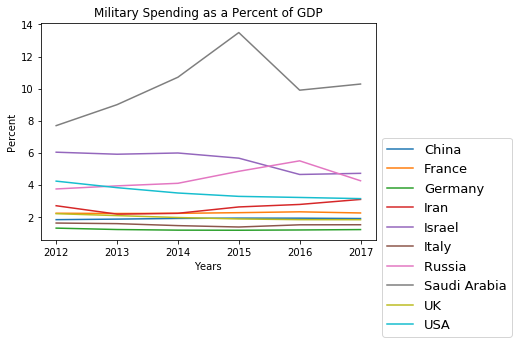

In [7]:
#plot the data

#Transpose the data frame, this will show the years on the x axis.
ShareofGDP.T.plot()

#Create labels for each axis
plt.ylabel('Percent')
plt.xlabel('Years')
plt.title('Military Spending as a Percent of GDP')
plt.legend(prop={'size': 13}, bbox_to_anchor=(1,0.5))

#Increase the size of the graph
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

In [8]:
#import gdp data and set index, so that we can compare military spending to GDP in fixed value
gdp = pd.read_csv('gdp.csv')

#Delete columns except for Country and 2012:2017
gdp  = gdp.iloc[:, list(range(1)) + [-6] + [-5] + [-4] + [-3] + [-2] + [-1]]

#Drop all rows except: US, China, Russia, Germany, UK, France, Italy, Iran, Isreal, Saudi Arabia, by index
gdp = gdp.iloc[[38,75,53,110, 113, 114,200,203,79,249],:]

#Sort the values in ascending order
gdp = gdp.sort_values(by='Country ', ascending=True)

#Set the index to the country column
gdp = gdp.set_index('Country ')


#Set rounding options
pd.set_option('display.precision', 6)

#gdp in millions, the data I have is in raw US dollars so I need it in Millions to beable to compare it to the Military Spending data which is in Millions. 
gdp = gdp/1000000

gdp

,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,8560550.0,9607220.0,10482400.0,11064700.0,11191000.0,12237700.0
France,2683830.0,2811080.0,2852170.0,2438210.0,2465130.0,2582500.0
Germany,3543980.0,3752510.0,3890610.0,3375610.0,3477800.0,3677440.0
Iran,598853.0,467415.0,434475.0,385874.0,418977.0,439514.0
Israel,257297.0,292489.0,308417.0,299094.0,317748.0,350851.0
Italy,2072820.0,2130490.0,2151730.0,1832870.0,1859380.0,1934800.0
Russia,2210260.0,2297130.0,2063660.0,1368400.0,1284730.0,1577520.0
Saudi Arabia,735975.0,746647.0,756350.0,654270.0,644936.0,683827.0
UK,2662090.0,2739820.0,3022830.0,2885570.0,2650850.0,2622430.0


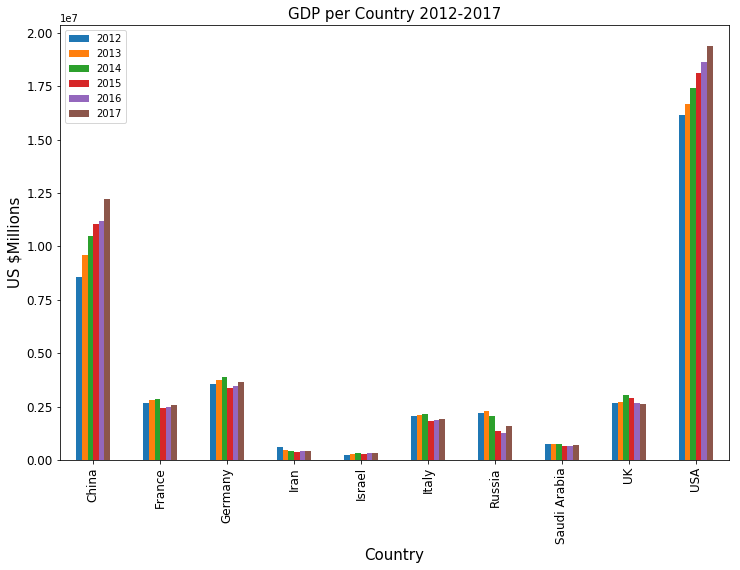

In [9]:
#Plot the data to show the GDP
gdp.plot(kind='bar')

#Set labels
plt.ylabel('US $Millions', fontsize = 15 )
plt.xlabel('Country', fontsize = 15)
plt.title('GDP per Country 2012-2017', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

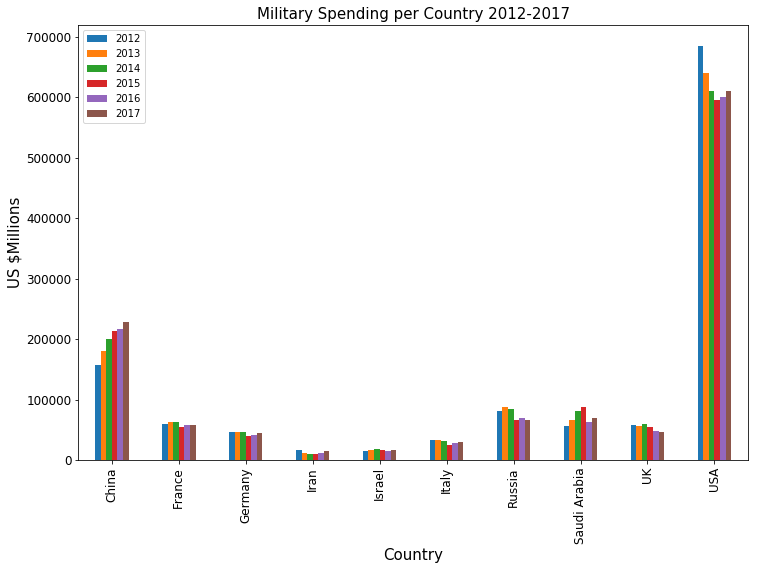

In [10]:
#Plot the data to show the Military spending in comparison to GDP
Militaryspending.plot(kind='bar')

#Set labels
plt.ylabel('US $Millions', fontsize = 15 )
plt.xlabel('Country', fontsize = 15)
plt.title('Military Spending per Country 2012-2017', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

AttributeError: Unknown property kind

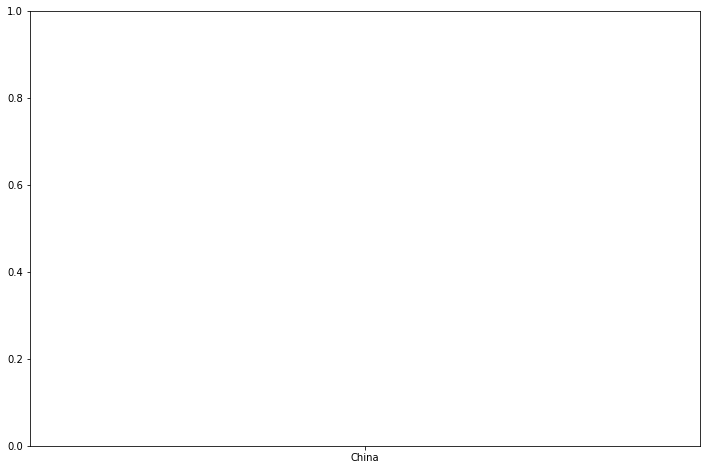

In [12]:
#Plot the data to show how gdp and military spending compare for each year
plt.figure();
plt.plot(Militaryspending[2012],kind = 'bar', marker='*', label="Military spending",color='red')
plt.plot(gdp['2012'],marker='*',label='GDP',color='Blue')
plt.title('GDP and Military spending 2012', fontsize = 15 )
plt.legend(loc=6,fontsize=15,bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.tick_params(labelsize=12)
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

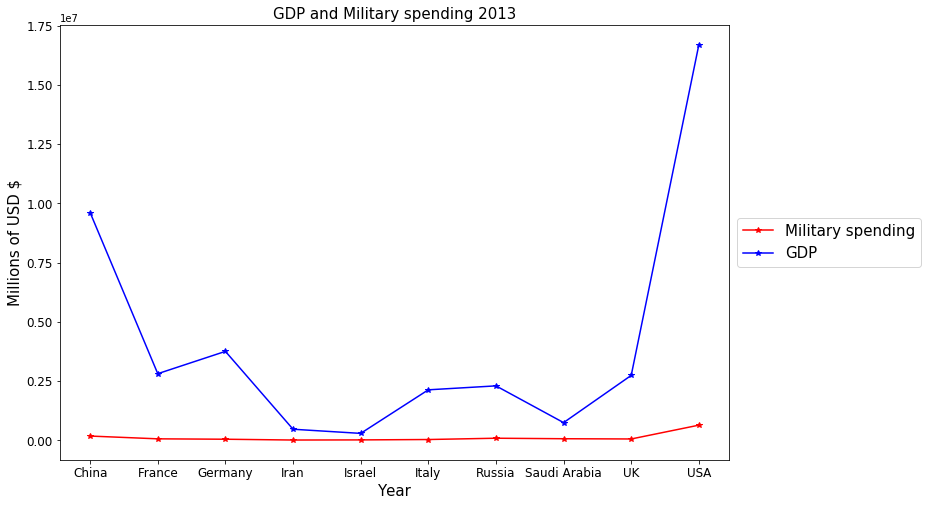

In [11]:
plt.figure();
plt.plot(Militaryspending[2013],marker='*', label="Military spending",color='red')
plt.plot(gdp['2013'],marker='*',label='GDP',color='Blue')
plt.title('GDP and Military spending 2013', fontsize = 15 )
plt.legend(loc=6,fontsize=15,bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.tick_params(labelsize=12)
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

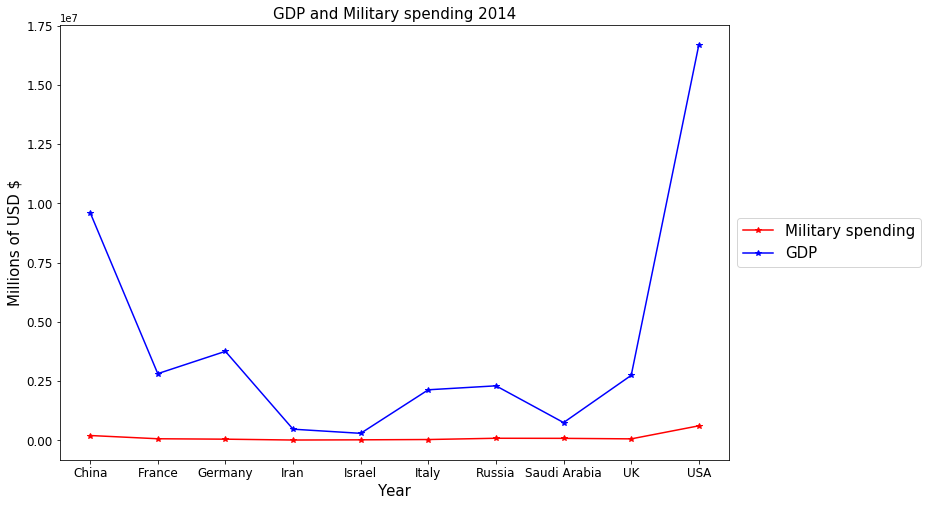

In [12]:
plt.figure();
plt.plot(Militaryspending[2014],marker='*', label="Military spending",color='red')
plt.plot(gdp['2013'],marker='*',label='GDP',color='Blue')
plt.title('GDP and Military spending 2014', fontsize = 15 )
plt.legend(loc=6,fontsize=15,bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.tick_params(labelsize=12)
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

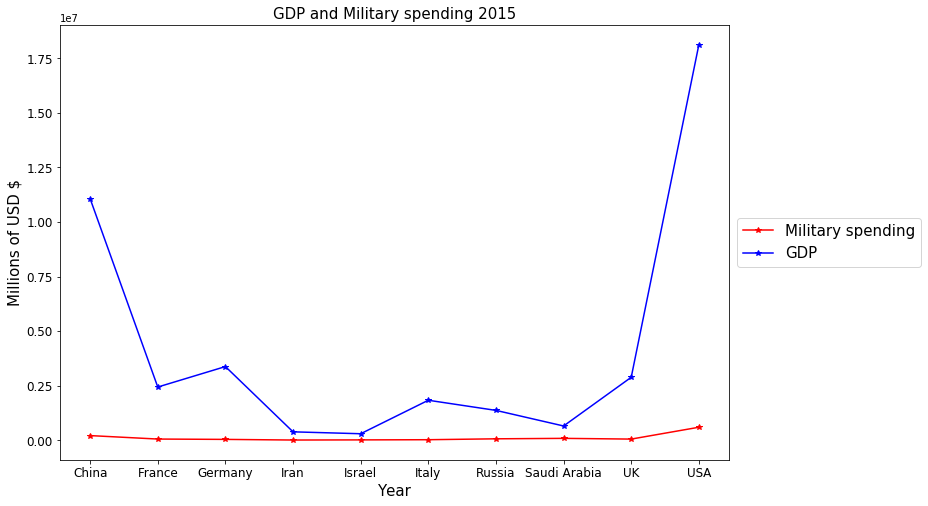

In [13]:
plt.figure();
plt.plot(Militaryspending[2015],marker='*', label="Military spending",color='red')
plt.plot(gdp['2015'],marker='*',label='GDP',color='Blue')
plt.title('GDP and Military spending 2015', fontsize = 15 )
plt.legend(loc=6,fontsize=15,bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.tick_params(labelsize=12)
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

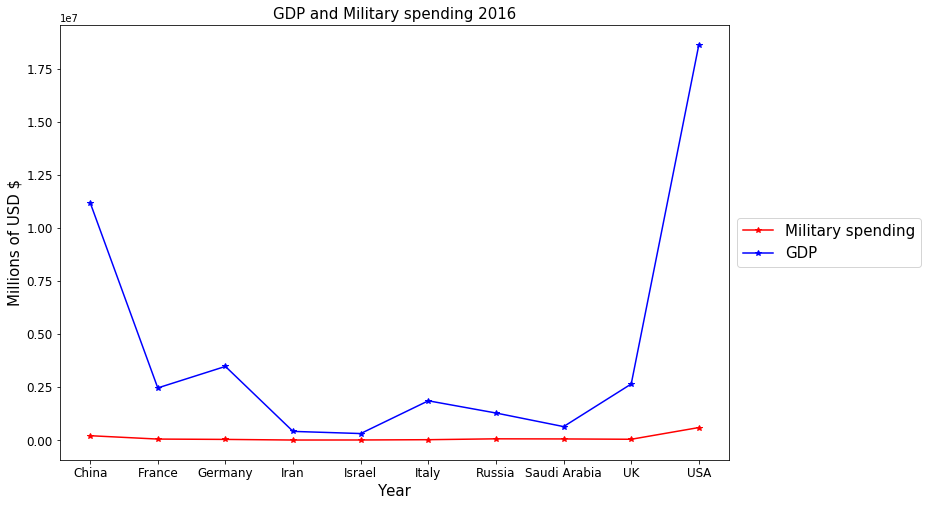

In [14]:
plt.figure();
plt.plot(Militaryspending[2016],marker='*', label="Military spending",color='red')
plt.plot(gdp['2016'],marker='*',label='GDP',color='Blue')
plt.title('GDP and Military spending 2016', fontsize = 15 )
plt.legend(loc=6,fontsize=15,bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.tick_params(labelsize=12)
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

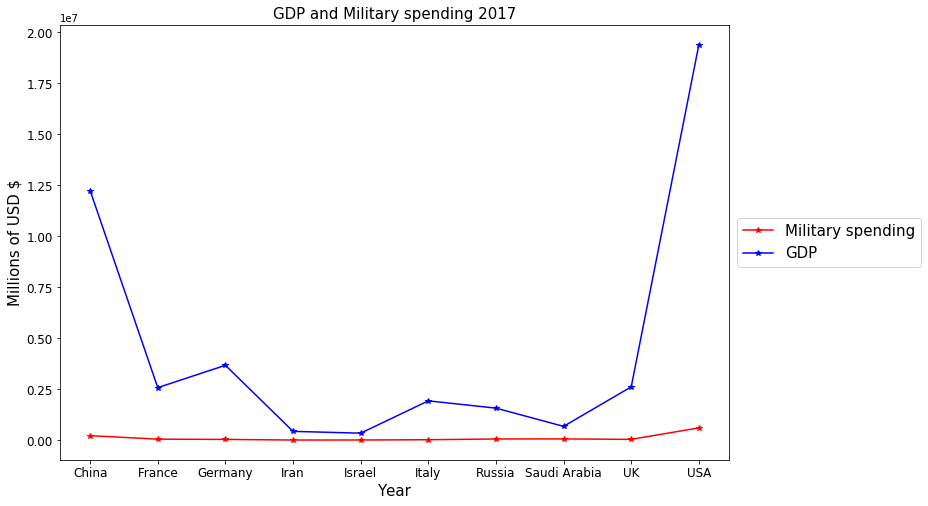

In [15]:
plt.figure();
plt.plot(Militaryspending[2017],marker='*', label="Military spending",color='red')
plt.plot(gdp['2017'],marker='*',label='GDP',color='Blue')
plt.title('GDP and Military spending 2017', fontsize = 15 )
plt.legend(loc=6,fontsize=15,bbox_to_anchor=(1,0.5))
plt.ylabel('Millions of USD $', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.tick_params(labelsize=12)
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

## Q2. Compare the data to the overall military spending off all ten countries.

In [16]:
#View the data frame
Militaryspending

,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,157390,179880,200772,214093,216031,228231
France,60035.2,62417.1,63613.6,55342.1,57358.4,57770.1
Germany,46470.9,45930.5,46102.7,39812.6,41579.5,44329.3
Iran,16494,11997.2,9901.11,10588.8,12264,14548.1
Israel,15545.7,17302.2,18481.1,16963.2,14782.8,16489
Italy,33732.8,33891.9,31572.4,25294.6,28205.8,29236.4
Russia,81469.4,88352.9,84696.5,66418.7,69245.3,66335
Saudi Arabia,56497.9,67020,80762.4,87185.9,63672.8,69413.3
UK,58495.7,56861.8,59182.9,53862.2,48118.9,47193.1


In [17]:
#View the data frame
MilitaryspendingnoUSA

,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,157390,179880,200772,214093,216031,228231
France,60035.2,62417.1,63613.6,55342.1,57358.4,57770.1
Germany,46470.9,45930.5,46102.7,39812.6,41579.5,44329.3
Iran,16494,11997.2,9901.11,10588.8,12264,14548.1
Israel,15545.7,17302.2,18481.1,16963.2,14782.8,16489
Italy,33732.8,33891.9,31572.4,25294.6,28205.8,29236.4
Russia,81469.4,88352.9,84696.5,66418.7,69245.3,66335
Saudi Arabia,56497.9,67020,80762.4,87185.9,63672.8,69413.3
UK,58495.7,56861.8,59182.9,53862.2,48118.9,47193.1


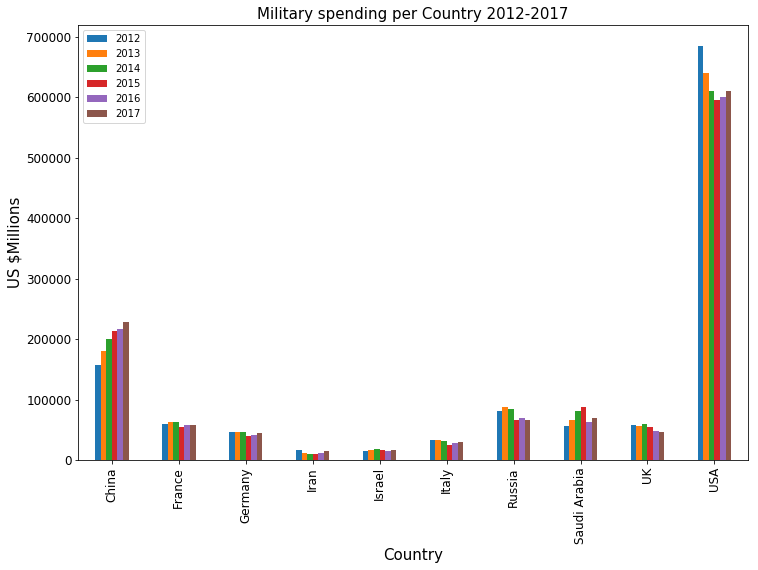

In [18]:
#Plot the data with the US
Militaryspending.plot(kind='bar')

#Set labels
plt.ylabel('US $Millions', fontsize = 15 )
plt.xlabel('Country', fontsize = 15)
plt.title('Military spending per Country 2012-2017', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

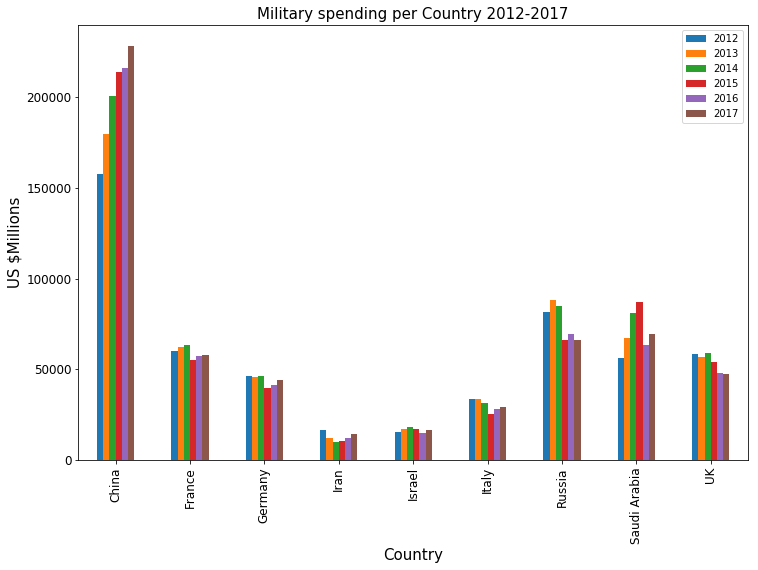

In [19]:
#Plot the data without the US

MilitaryspendingnoUSA.plot(kind='bar')

#Set labels
plt.ylabel('US $Millions', fontsize = 15 )
plt.xlabel('Country', fontsize = 15)
plt.title('Military spending per Country 2012-2017', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

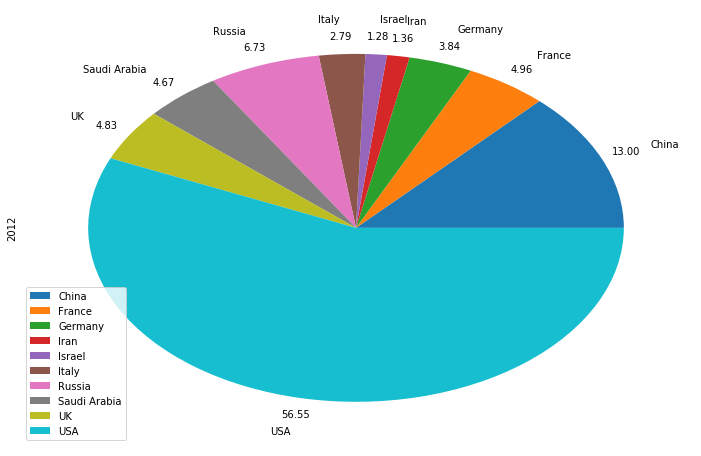

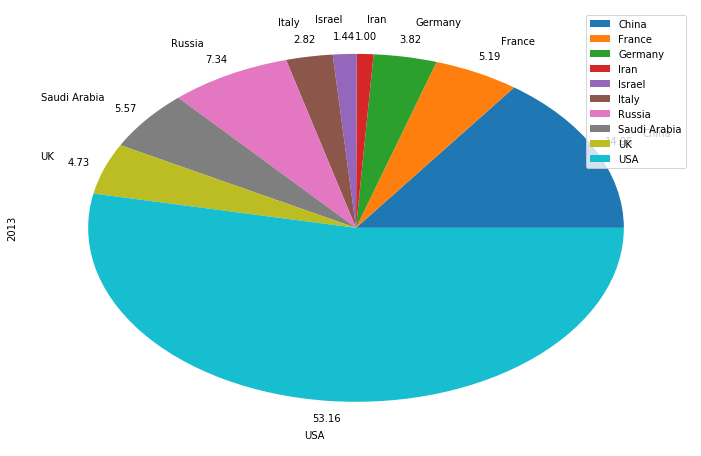

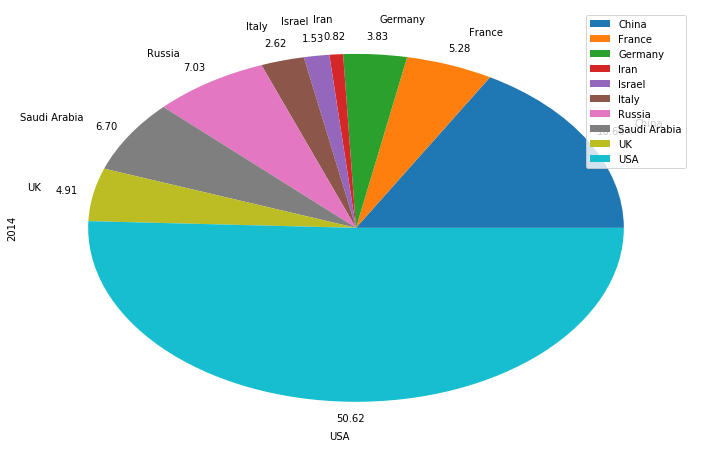

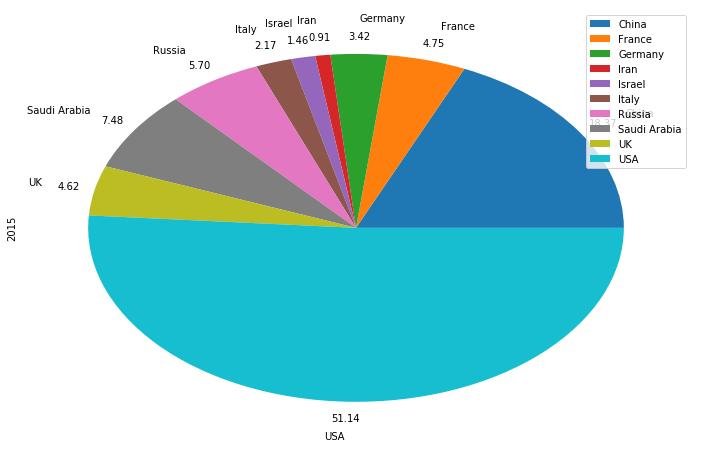

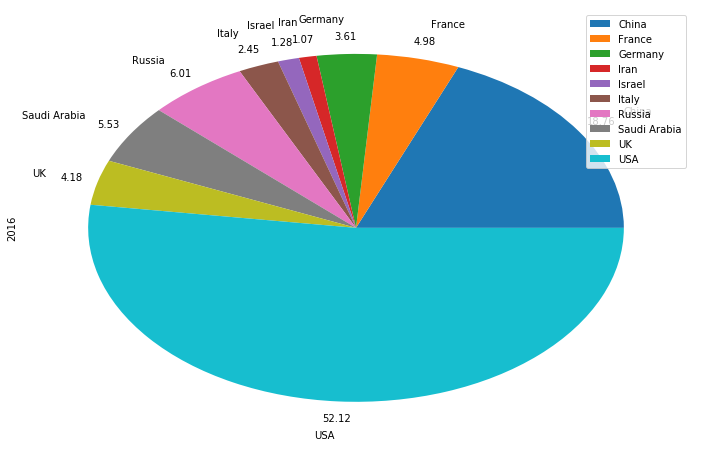

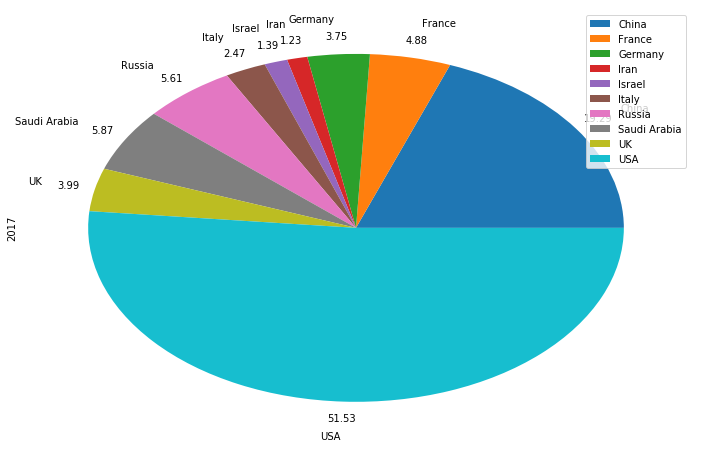

In [20]:
#Make pie chart to show the percent that each country takes up compared to the overall military spending

Militaryspending.plot.pie(y = 2012, autopct='%.2f', pctdistance=1.1, labeldistance=1.2)
Militaryspending.plot.pie(y = 2013, autopct='%.2f', pctdistance=1.1, labeldistance=1.2)
Militaryspending.plot.pie(y = 2014, autopct='%.2f', pctdistance=1.1, labeldistance=1.2)
Militaryspending.plot.pie(y = 2015, autopct='%.2f', pctdistance=1.1, labeldistance=1.2)
Militaryspending.plot.pie(y = 2016, autopct='%.2f', pctdistance=1.1, labeldistance=1.2)
Militaryspending.plot.pie(y = 2017, autopct='%.2f', pctdistance=1.1, labeldistance=1.2)


# Q3. Compare the per person military spending to the per person GDP

In [21]:
#Importing Per Capita sheet to see what the Military spending is per person, to eventually compare to the GDP per capita
Percapita = pd.read_excel(xls, 'PerCapita')

#Delete columns except for Country and 2012:2017
Percapita  = Percapita.iloc[:, list(range(1)) + [-6] + [-5] + [-4] + [-3] + [-2] + [-1]]

#Drop all rows except: US, China, Russia, Germany, UK, France, Italy, Iran, Isreal, Saudi Arabia

#Create a list of the countries I need
Country = ("USA", "China", "Russia", "Germany", "UK", "France", "Italy", "Iran", "Israel", "Saudi Arabia")

#Select the Country column and select the Country list, return rows that contain the items in the Country list
Percapita = Percapita.loc[Percapita['Country'].isin(Country)]

#sort by ascending so that the dataframe is in alphabetical order
Percapita = Percapita.sort_values(by='Country', ascending=True)

#set rounding options 
pd.set_option('display.precision', 6) 

#reset index
Percapita = Percapita.set_index('Country')

Percapita


,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,114.449,130.085,144.429,153.249,153.923,161.921
France,943.358,976.489,991.01,858.587,886.245,889.051
Germany,573.246,565.194,565.749,487.256,507.595,539.849
Iran,215.738,154.932,126.272,133.426,152.77,179.245
Israel,2019.15,2212.25,2327.21,2103.43,1804.58,1981.48
Italy,564.718,568.008,529.866,425.09,474.607,492.528
Russia,568.045,615.283,589.146,461.6,480.989,460.692
Saudi Arabia,1942.42,2238.14,2624.14,2762.79,1972.78,2107.38
UK,910.434,879.653,910.286,823.618,731.418,713.085


In [22]:
## Import csv file (from world bank) to clean data to eventually compare military spending and GDP per capita

GDPpercap= pd.read_csv(r"GDPpercap.csv")

#Delete columns except for Country and 2012:2017
GDPpercap  = GDPpercap.iloc[:, list(range(1)) + [-6] + [-5] + [-4] + [-3] + [-2] + [-1]]

#Change column name from Country Name to Country, for consistency throughout project
GDPpercap=GDPpercap.rename(columns = {'Country Name':'Country'})

#Drop all rows except: US, China, Russia, Germany, UK, France, Italy, Iran, Isreal, Saudi Arabia

#Create a list of the countries I need
Country = ("USA", "China", "Russia", "Germany", "UK", "France", "Italy", "Iran", "Israel", "Saudi Arabia")

#Select the Country column and select the Country list, return rows that contain the items in the Country list
GDPpercap = GDPpercap.loc[GDPpercap['Country'].isin(Country)]

#sort by ascending so that the dataframe is in alphabetical order
GDPpercap= GDPpercap.sort_values(by='Country', ascending=True)

#Set rounding options
pd.set_option('display.precision', 2) 

#Reindex for easier plotting
GDPpercap = GDPpercap.set_index('Country')

GDPpercap


,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,6337.88,7077.77,7683.50,8069.21,8117.27,8826.99
France,40874.72,42592.95,43008.65,36613.38,36870.22,38476.66
Germany,44065.25,46530.91,48042.56,41323.92,42232.57,44469.91
Iran,7832.90,6036.19,5540.98,4862.30,5219.11,5415.21
Israel,32525.96,36291.23,37539.95,35690.96,37180.85,40270.25
Italy,34814.13,35370.28,35396.67,30180.32,30668.98,31952.98
Russia,15434.57,16007.09,14125.91,9346.62,8759.04,10743.10
Saudi Arabia,25303.09,24934.39,24575.40,20732.86,19982.09,20760.91
UK,41790.78,42724.07,46783.47,44305.55,40412.03,39720.44


In [23]:
#Join the two dataframes for easier comparison
GDPandMilitaryspendingpercap = Percapita.join(GDPpercap)

#Set rounding options
pd.set_option('display.precision', 4) 

#Rename Columns, this makes it easy to distinguish between the two dataframes(joined)
GDPandMilitaryspendingpercap.columns = ['MS2012', 'MS2013', 'MS2014', 'MS2015', 'MS2016', 'MS2017','GDP2012','GDP2013','GDP2014','GDP2015','GDP2016','GDP2017']

#Add a total Military Spending and GDP (per capita) Column for each year, this will allow us to do a stacked bar chart. 
GDPandMilitaryspendingpercap['Total MS and GDP percap 2012'] = GDPandMilitaryspendingpercap['MS2012'] + GDPandMilitaryspendingpercap['GDP2012']
GDPandMilitaryspendingpercap['Total MS and GDP percap 2013'] = GDPandMilitaryspendingpercap['MS2013'] + GDPandMilitaryspendingpercap['GDP2013']
GDPandMilitaryspendingpercap['Total MS and GDP percap 2014'] = GDPandMilitaryspendingpercap['MS2014'] + GDPandMilitaryspendingpercap['GDP2014']
GDPandMilitaryspendingpercap['Total MS and GDP percap 2015'] = GDPandMilitaryspendingpercap['MS2015'] + GDPandMilitaryspendingpercap['GDP2015']
GDPandMilitaryspendingpercap['Total MS and GDP percap 2016'] = GDPandMilitaryspendingpercap['MS2016'] + GDPandMilitaryspendingpercap['GDP2016']
GDPandMilitaryspendingpercap['Total MS and GDP percap 2017'] = GDPandMilitaryspendingpercap['MS2017'] + GDPandMilitaryspendingpercap['GDP2017']

GDPandMilitaryspendingpercap

,MS2012,MS2013,MS2014,MS2015,MS2016,MS2017,GDP2012,GDP2013,GDP2014,GDP2015,GDP2016,GDP2017,Total MS and GDP percap 2012,Total MS and GDP percap 2013,Total MS and GDP percap 2014,Total MS and GDP percap 2015,Total MS and GDP percap 2016,Total MS and GDP percap 2017
Country,,,,,,,,,,,,,,,,,,
China,114.4,130.1,144.4,153.2,153.9,161.9,6337.8833,7077.7708,7683.5026,8069.2130,8117.2675,8826.9941,6452,7208,7828,8222,8271,8989
France,943.4,976.5,991,858.6,886.2,889.1,40874.7160,42592.9515,43008.6526,36613.3752,36870.2191,38476.6586,4.182e+04,4.357e+04,4.4e+04,3.747e+04,3.776e+04,3.937e+04
Germany,573.2,565.2,565.7,487.3,507.6,539.8,44065.2489,46530.9114,48042.5634,41323.9215,42232.5742,44469.9091,4.464e+04,4.71e+04,4.861e+04,4.181e+04,4.274e+04,4.501e+04
Iran,215.7,154.9,126.3,133.4,152.8,179.2,7832.9026,6036.1921,5540.9841,4862.2997,5219.1098,5415.2096,8049,6191,5667,4996,5372,5594
Israel,2019,2212,2327,2103,1805,1981,32525.9566,36291.2321,37539.9518,35690.9631,37180.8498,40270.2513,3.455e+04,3.85e+04,3.987e+04,3.779e+04,3.899e+04,4.225e+04
Italy,564.7,568,529.9,425.1,474.6,492.5,34814.1251,35370.2753,35396.6657,30180.3215,30668.9814,31952.9759,3.538e+04,3.594e+04,3.593e+04,3.061e+04,3.114e+04,3.245e+04
Russia,568,615.3,589.1,461.6,481,460.7,15434.5748,16007.0900,14125.9087,9346.6164,8759.0361,10743.0966,1.6e+04,1.662e+04,1.472e+04,9808,9240,1.12e+04
Saudi Arabia,1942,2238,2624,2763,1973,2107,25303.0946,24934.3861,24575.4030,20732.8617,19982.0856,20760.9060,2.725e+04,2.717e+04,2.72e+04,2.35e+04,2.195e+04,2.287e+04
UK,910.4,879.7,910.3,823.6,731.4,713.1,41790.7791,42724.0679,46783.4692,44305.5546,40412.0336,39720.4434,4.27e+04,4.36e+04,4.769e+04,4.513e+04,4.114e+04,4.043e+04


In [24]:
#Plot the data to make a plot for each year comparing per cap military spending to per cap gdp

def plot_percapita2012(df, limit=10):
    df = df.loc[:, ['MS2012', 'GDP2012']][:limit]
    df['Total MS and GDP percap 2012'] = df['MS2012'] - df['GDP2012']
    del df['Total MS and GDP percap 2012']
    df.plot(kind='bar', stacked=True, sort_columns = True)
    plt.ylabel('$US Millions', fontsize=15)
    plt.xlabel('Country', fontsize=15)
    plt.title('Per Capita Military Spending vs Per Capita GDP 2012', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(loc=0, prop={'size': 15})
    plt.show()

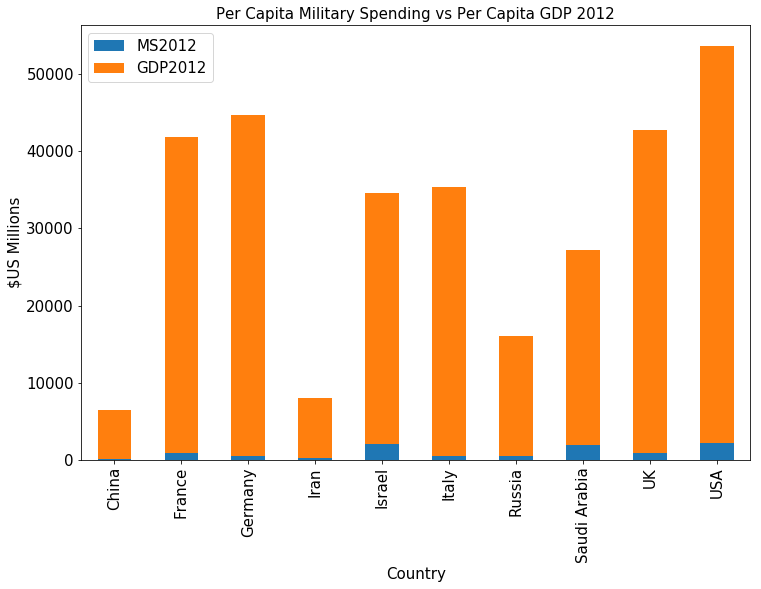

In [25]:
plot_percapita2012(GDPandMilitaryspendingpercap, 10)

In [26]:
#Plot for 2013 

def plot_percapita2013(df, limit=10):
    df = df.loc[:, ['MS2013', 'GDP2013']][:limit]
    df['Total MS and GDP percap 2013'] = df['MS2013'] - df['GDP2013']
    del df['Total MS and GDP percap 2013']
    df.plot(kind='bar', stacked=True, sort_columns = True)
    plt.ylabel('$US Millions', fontsize=15)
    plt.title('Per Capita Military Spending vs Per Capita GDP2013', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(loc=0, prop={'size': 15})
    plt.xlabel('Country', fontsize=15)
    plt.show()

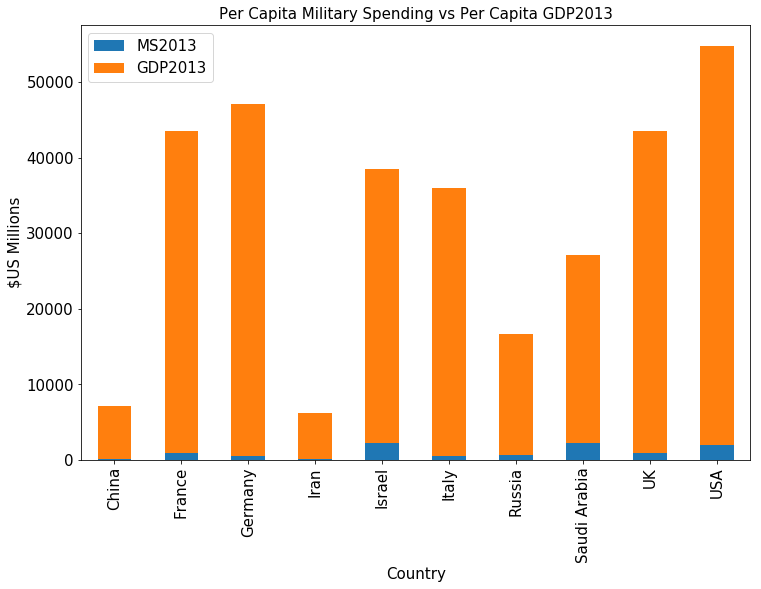

In [27]:
plot_percapita2013(GDPandMilitaryspendingpercap, 10)

In [28]:
#Plot 2014

def plot_percapita2014(df, limit=10):
    df = df.loc[:, ['MS2014', 'GDP2014']][:limit]
    df['Total MS and GDP percap 2014'] = df['MS2014'] - df['GDP2014']
    del df['Total MS and GDP percap 2014']
    df.plot(kind='bar', stacked=True, sort_columns = True)
    plt.ylabel('$US Millions', fontsize=15)
    plt.title('Per Capita Military Spending vs. Per Capita GDP in 2014', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(loc=0, prop={'size': 15})
    plt.xlabel('Country', fontsize=15)
    plt.show()



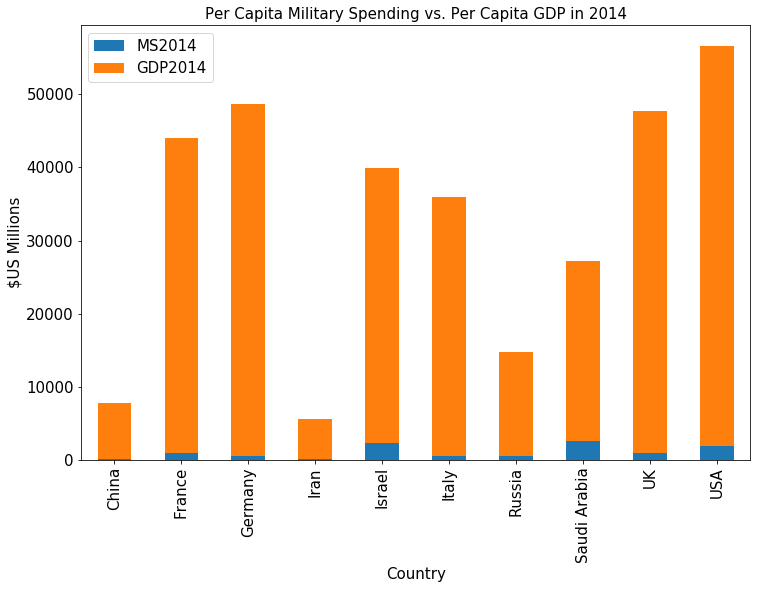

In [29]:
plot_percapita2014(GDPandMilitaryspendingpercap, 10)

In [30]:
#Plot 2015

def plot_percapita2015(df, limit=10):
    df = df.loc[:, ['MS2015', 'GDP2015']][:limit]
    df['Total MS and GDP percap 2015'] = df['MS2015'] - df['GDP2015']
    del df['Total MS and GDP percap 2015']
    df.plot(kind='bar', stacked=True, sort_columns = True)
    plt.ylabel('$US Millions', fontsize=15)
    plt.title('2015', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(loc=0, prop={'size': 15})
    plt.xlabel('Country', fontsize=15)
    plt.show()

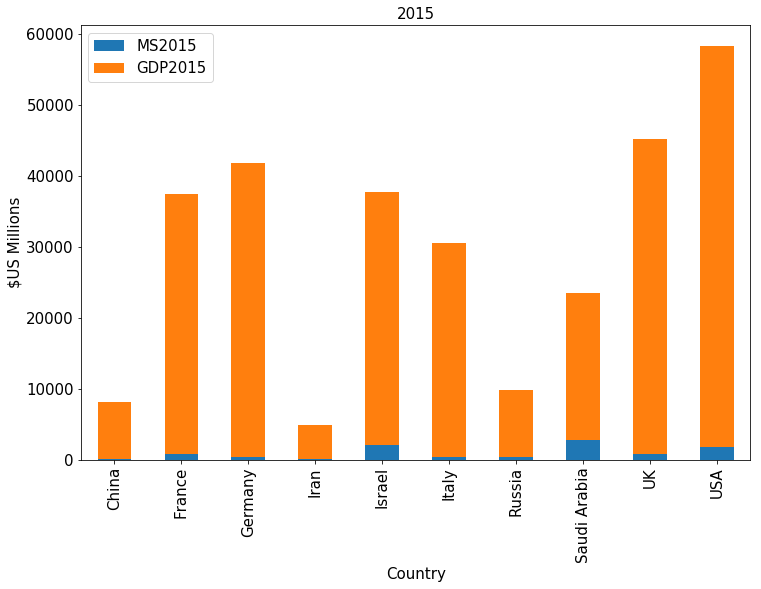

In [31]:
plot_percapita2015(GDPandMilitaryspendingpercap, 10)

In [32]:
#Plot 2016 

def plot_percapita2016(df, limit=10):
    df = df.loc[:, ['MS2016', 'GDP2016']][:limit]
    df['Total MS and GDP percap 2016'] = df['MS2016'] - df['GDP2016']
    del df['Total MS and GDP percap 2016']
    df.plot(kind='bar', stacked=True, sort_columns = True)
    plt.ylabel('$US Millions', fontsize=15)
    plt.title('Per Capita Military Spending vs. Per Capita GDP in 2016', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(loc=0, prop={'size': 15})
    plt.xlabel('Country', fontsize=15)
    plt.show()

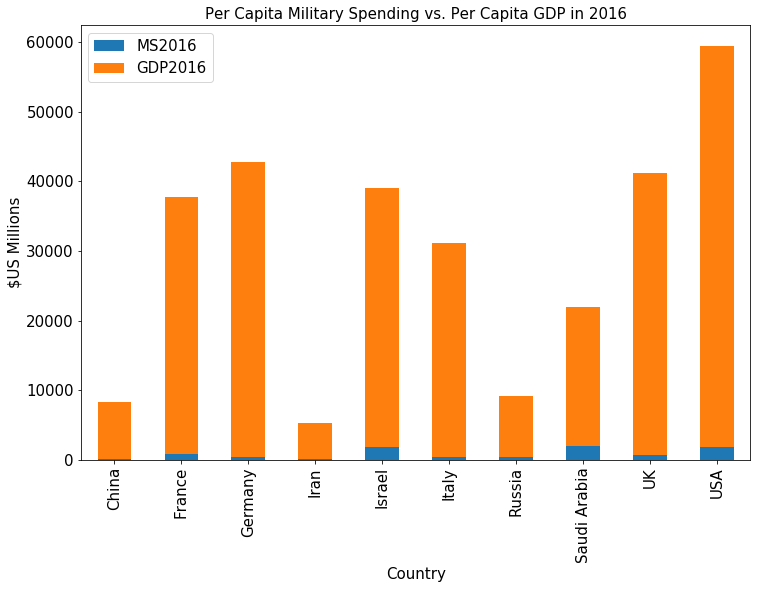

In [33]:
plot_percapita2016(GDPandMilitaryspendingpercap, 10)

In [34]:
#Plot 2017

def plot_percapita2017(df, limit=10):
    df = df.loc[:, ['MS2017', 'GDP2017']][:limit]
    df['Total MS and GDP percap 2017'] = df['MS2017'] - df['GDP2017']
    del df['Total MS and GDP percap 2017']
    df.plot(kind='bar', stacked=True, sort_columns = True)
    plt.ylabel('$US Millions', fontsize=15)
    plt.title('2017', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(loc=0, prop={'size': 15})
    plt.xlabel('Country', fontsize=15)
    plt.show()

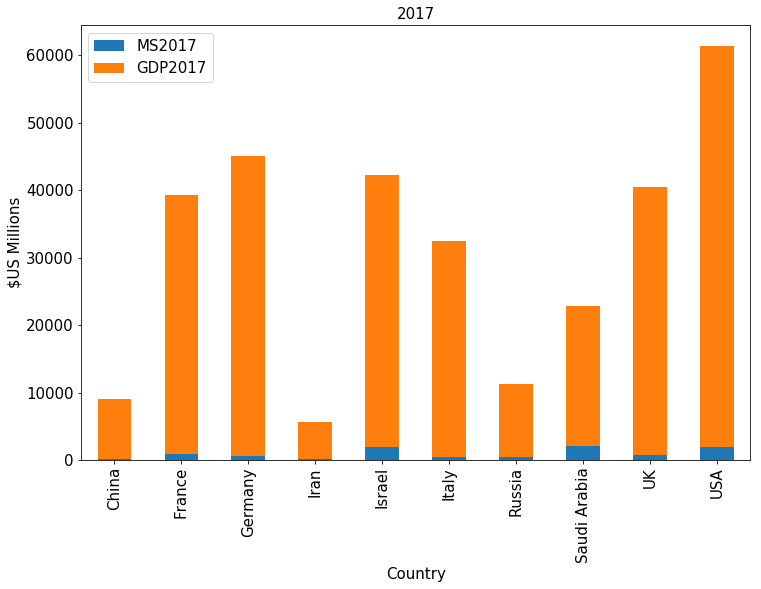

In [35]:
plot_percapita2017(GDPandMilitaryspendingpercap, 10)

In [36]:
#Show Per Capita Military spending as a percent of Per Capit GDP

#First need to convert per capita military spending columns to a string
Percapita.columns = Percapita.columns.astype(str)

GDPandMilitaryspendingpercappercent=Percapita*100/GDPpercap
GDPandMilitaryspendingpercappercent

,2012,2013,2014,2015,2016,2017
Country,,,,,,
China,1.806,1.838,1.88,1.899,1.896,1.834
France,2.308,2.293,2.304,2.345,2.404,2.311
Germany,1.301,1.215,1.178,1.179,1.202,1.214
Iran,2.754,2.567,2.279,2.744,2.927,3.31
Israel,6.208,6.096,6.199,5.893,4.854,4.92
Italy,1.622,1.606,1.497,1.408,1.548,1.541
Russia,3.68,3.844,4.171,4.939,5.491,4.288
Saudi Arabia,7.677,8.976,10.68,13.33,9.873,10.15
UK,2.179,2.059,1.946,1.859,1.81,1.795


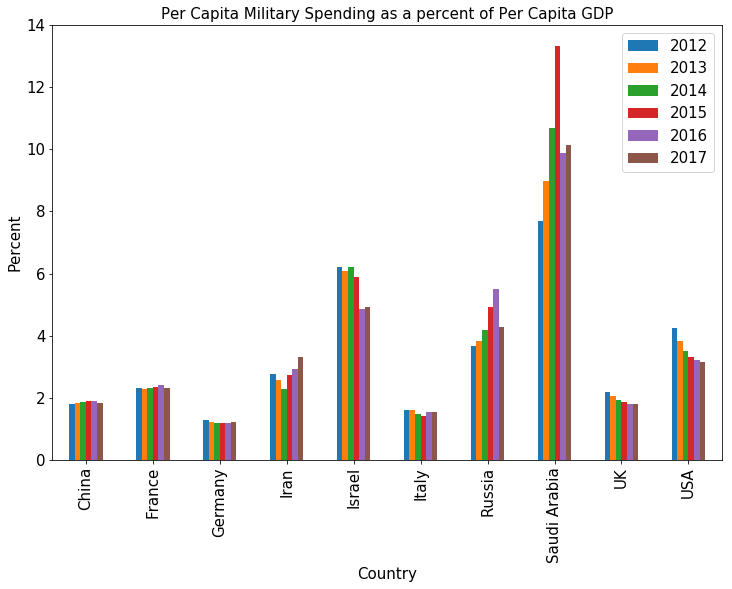

In [37]:
#Plot this data showing per cap military spending as a percent of per cap gdp

GDPandMilitaryspendingpercappercent.plot(kind='bar')
plt.ylabel('Percent', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.title('Per Capita Military Spending as a percent of Per Capita GDP', fontsize=15)
plt.legend(loc=1, prop={'size': 15})
plt.tick_params(labelsize=15)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

# Q4. Single out the fastest growing countries in military spending in fixed value and in percentage.

In [38]:
#Set rounding 
pd.set_option('display.precision', 7) 

#Create columns to show the difference between each year for each country, then create a column showing total difference. 
Militaryspending['Diff between 12 & 13'] = Militaryspending[2013]-Militaryspending[2012]
Militaryspending['Diff between 13 & 14'] = Militaryspending[2014]-Militaryspending[2013]
Militaryspending['Diff between 14 & 15'] = Militaryspending[2015]-Militaryspending[2014]
Militaryspending['Diff between 15 & 16'] = Militaryspending[2016]-Militaryspending[2015]
Militaryspending['Diff between 16 & 17'] = Militaryspending[2017]-Militaryspending[2016]
Militaryspending['Total difference 2012-2017']= Militaryspending[2017]-Militaryspending[2012]

#Delete all columns except the necessary ones for the analysis
Militaryspendingdifference = Militaryspending.iloc[:, list(range(0)) + [-6] + [-5] + [-4] + [-3] + [-2]]

Militaryspendingdifference

,Diff between 12 & 13,Diff between 13 & 14,Diff between 14 & 15,Diff between 15 & 16,Diff between 16 & 17
Country,,,,,
China,22490.07,20891.75,13320.87,1938.21,12199.39
France,2381.945,1196.47,-8271.438,2016.283,411.7088
Germany,-540.3303,172.1324,-6290.097,1766.919,2749.787
Iran,-4496.776,-2096.082,687.6645,1675.188,2284.093
Israel,1756.545,1178.885,-1517.878,-2180.445,1706.244
Italy,159.16,-2319.47,-6277.813,2911.215,1030.549
Russia,6883.497,-3656.392,-18277.8,2826.601,-2910.322
Saudi Arabia,10522.13,13742.4,6423.467,-23513.07,5740.533
UK,-1633.897,2321.099,-5320.673,-5743.242,-925.8469


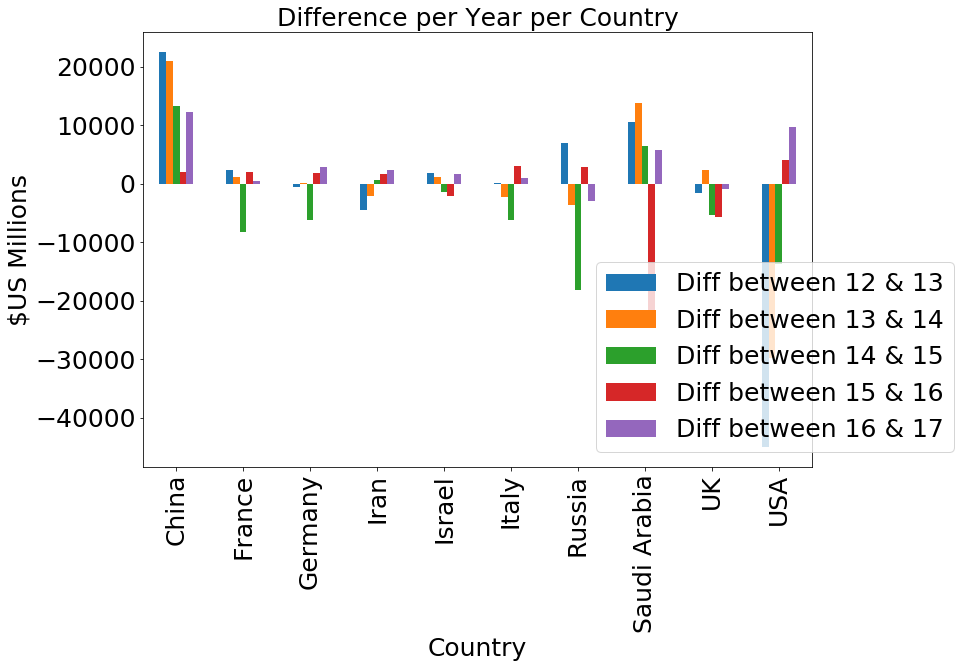

In [39]:
#Plot the difference per year
Militaryspendingdifference.plot(kind='bar')
plt.ylabel('$US Millions', fontsize=25)
plt.xlabel('Country', fontsize=25)
plt.title('Difference per Year per Country', fontsize=25)
plt.legend(loc=1, prop={'size': 25}, bbox_to_anchor=(1.23,0.5))
plt.tick_params(labelsize=25)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 26
fig_size[1] = 18
plt.show()

In [40]:
#Delete all columns except the total difference column
Militaryspendingdifferencetotal = Militaryspending.iloc[:, list(range(0))+[-1]]
Militaryspendingdifferencetotal

,Total difference 2012-2017
Country,
China,70840.3
France,-2265.031
Germany,-2141.589
Iran,-1945.913
Israel,943.3508
Italy,-4496.36
Russia,-15134.41
Saudi Arabia,12915.47
UK,-11302.56


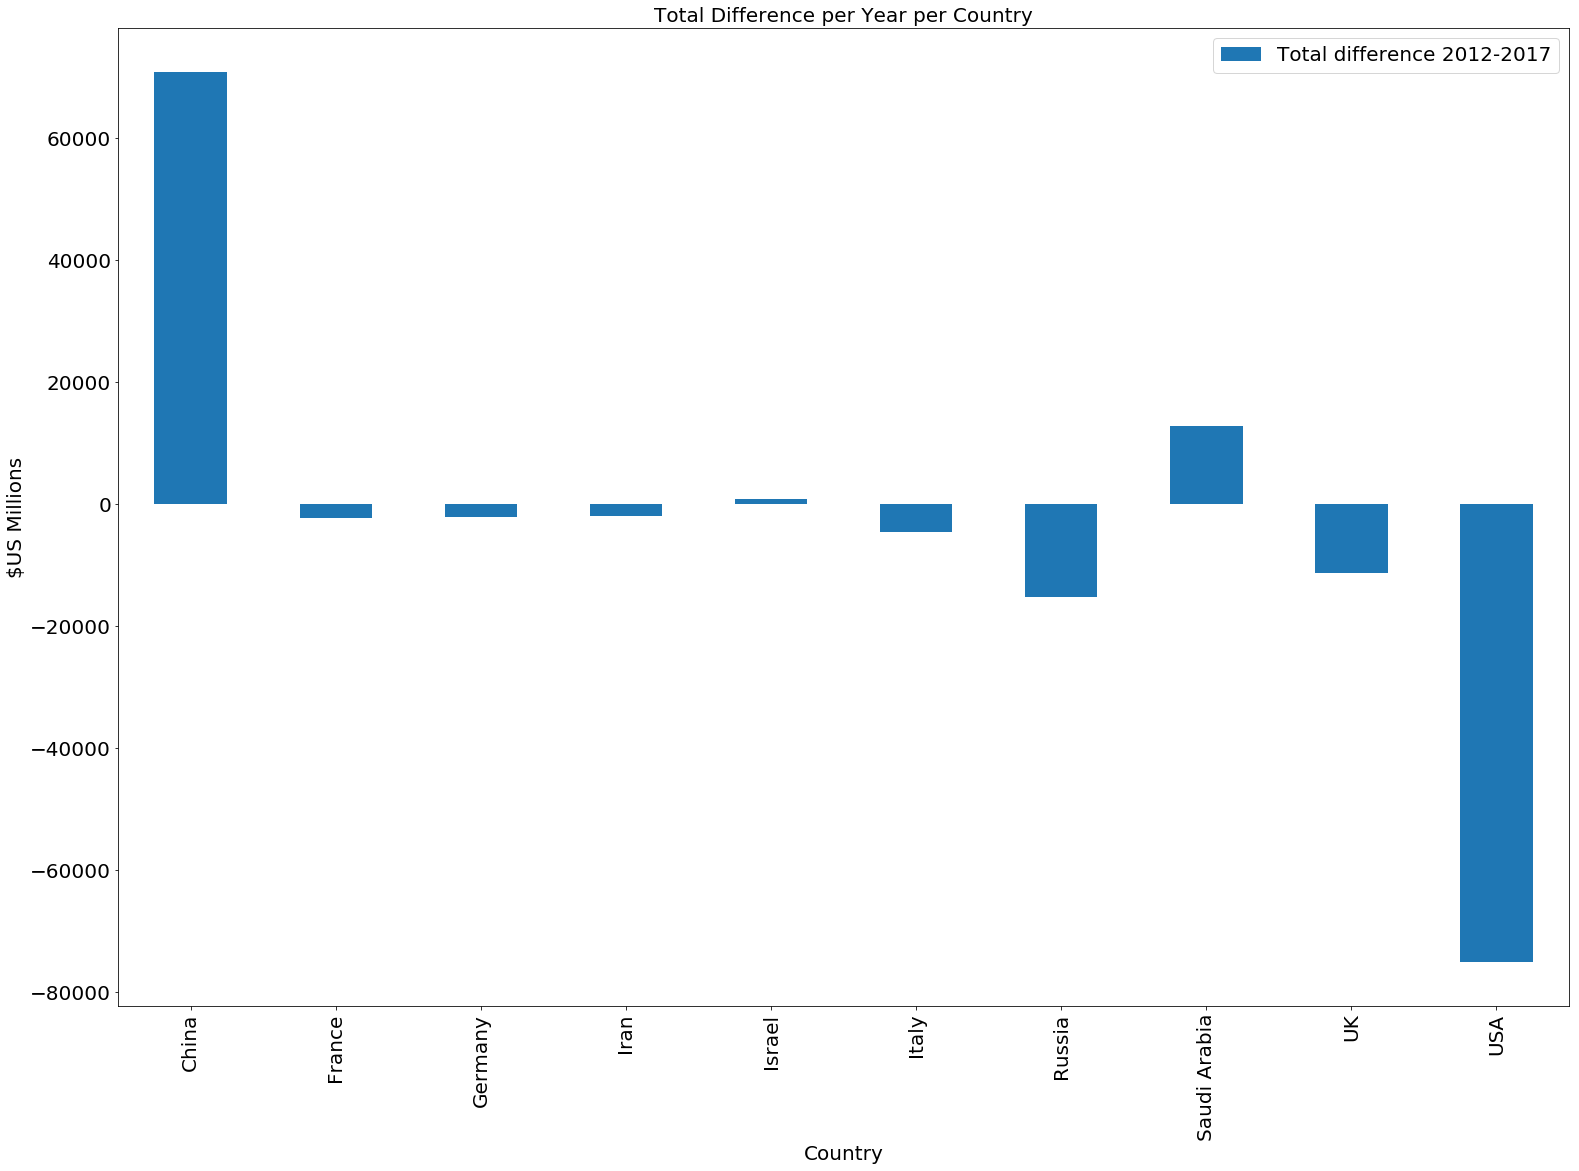

In [41]:
#Plot the total difference
Militaryspendingdifferencetotal.plot(kind='bar')
plt.ylabel('$US Millions', fontsize =20)
plt.xlabel('Country', fontsize=20)
plt.title('Total Difference per Year per Country', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(loc=1, prop={'size': 20})
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 16
plt.show()

In [42]:
#Delete columns except for Country and 2012:2017
Militaryspending  = Militaryspending.iloc[:, list(range(0)) + [0] + [1] + [2] + [3] + [4] + [5]]

#Transpose the data frame in preparation to use the percent change function
MilitaryspendingT = Militaryspending.T

#Find the percent change between years
Militaryspendingpct = MilitaryspendingT.pct_change()

#set options
pd.set_option('display.precision', 3) 

Militaryspendingpct = Militaryspendingpct.iloc[1:]

#Multiply by 100 to see the percentage
Militaryspendingpct*100

Country,China,France,Germany,Iran,Israel,Italy,Russia,Saudi Arabia,UK,USA
2013,14.289,3.968,-1.163,-27.263,11.299,0.472,8.449,18.624,-2.793,-6.583
2014,11.614,1.917,0.375,-17.471,6.813,-6.844,-4.138,20.505,4.082,-4.657
2015,6.635,-13.003,-13.644,6.945,-8.213,-19.884,-21.580,7.954,-8.990,-2.264
2016,0.905,3.643,4.438,15.820,-12.854,11.509,4.256,-26.969,-10.663,0.671
2017,5.647,0.718,6.613,18.624,11.542,3.654,-4.203,9.016,-1.924,1.608


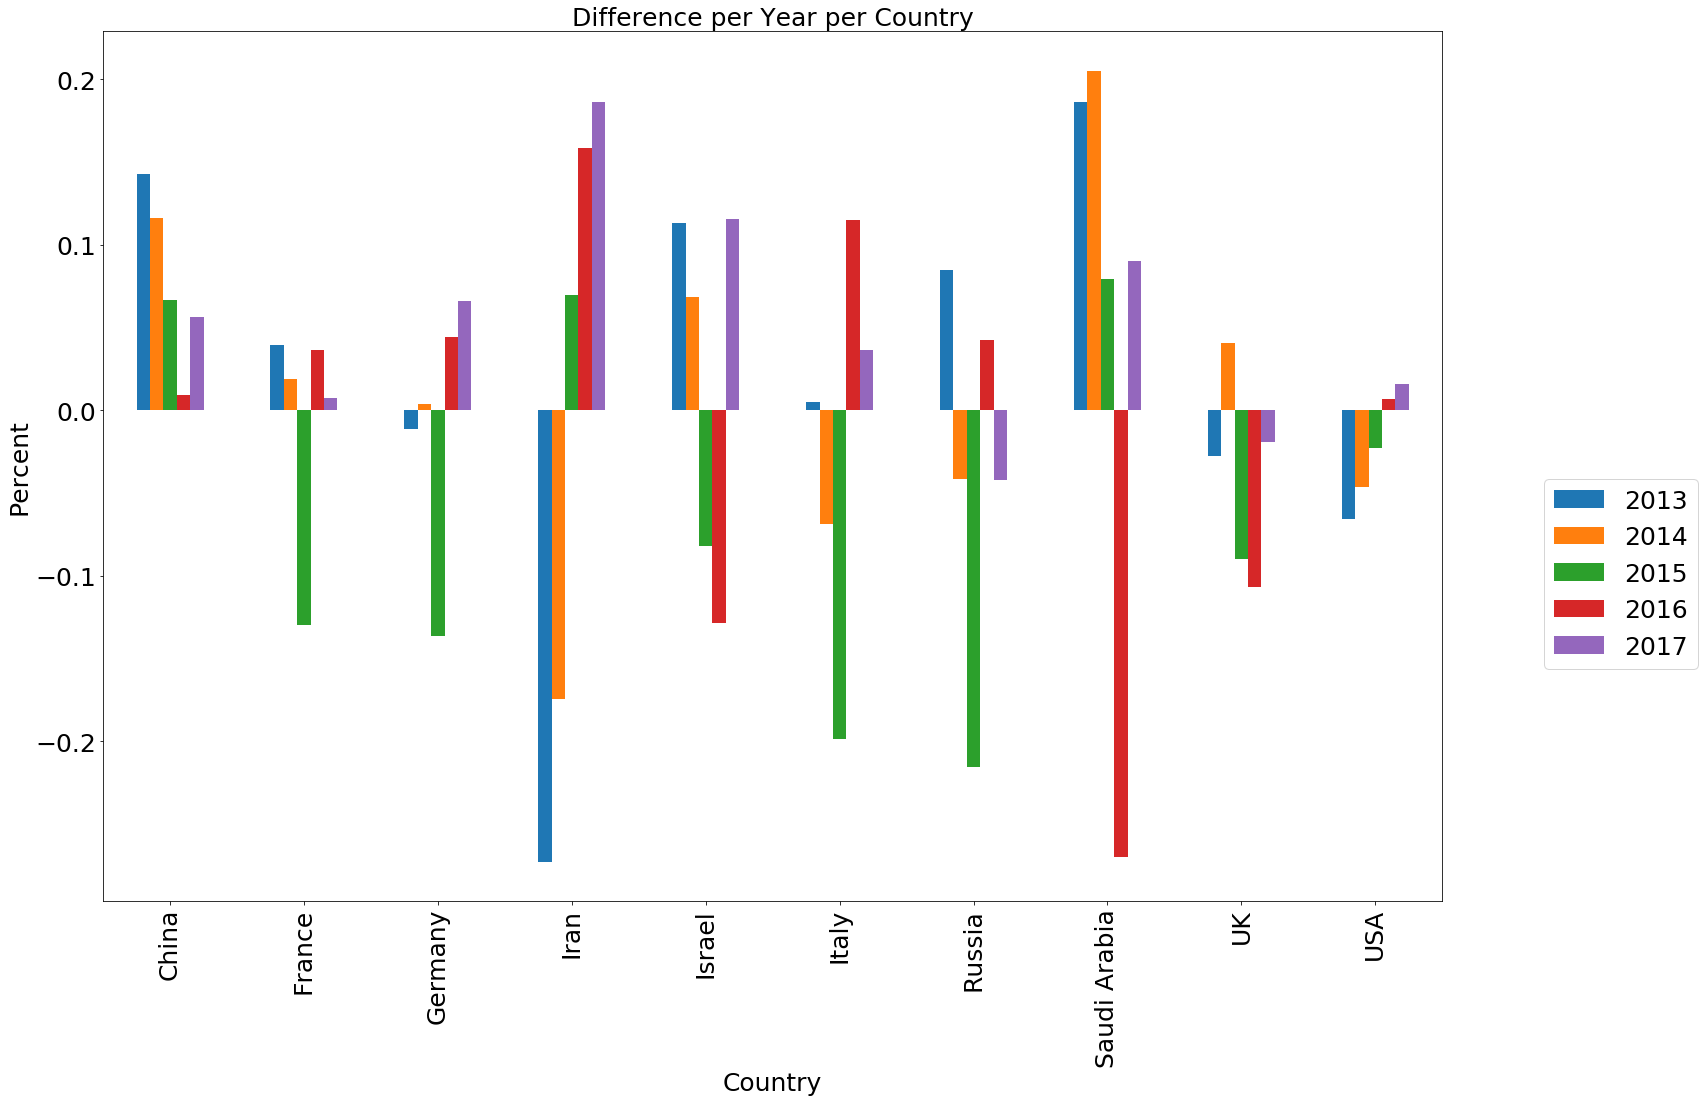

In [43]:
#Transpose the dataframe to make sure that countries are plotted on the x-axis
Militaryspendingpct=Militaryspendingpct.T

#Plot the difference per year
Militaryspendingpct.plot(kind='bar')
plt.ylabel('Percent', fontsize=25)
plt.xlabel('Country', fontsize=25)
plt.title('Difference per Year per Country', fontsize=25)
plt.legend(loc=1, prop={'size': 25}, bbox_to_anchor=(1.2,0.5))
plt.tick_params(labelsize=25)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 26
fig_size[1] = 18
plt.show()

In [44]:
#Add total percent change column
Militaryspending['Total Percent Change'] = ((Militaryspending[2017]-Militaryspending[2012])/Militaryspending[2012])*100

#Delete all columns except 'Total Percent Change'
Militaryspendingpcttot = Militaryspending.iloc[:, list(range(0))+[-1]]

Militaryspendingpcttot

C:\Users\Jessica Fogerty\Anaconda32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Total Percent Change
Country,
China,45
France,-3.77
Germany,-4.61
Iran,-11.8
Israel,6.07
Italy,-13.3
Russia,-18.6
Saudi Arabia,22.9
UK,-19.3


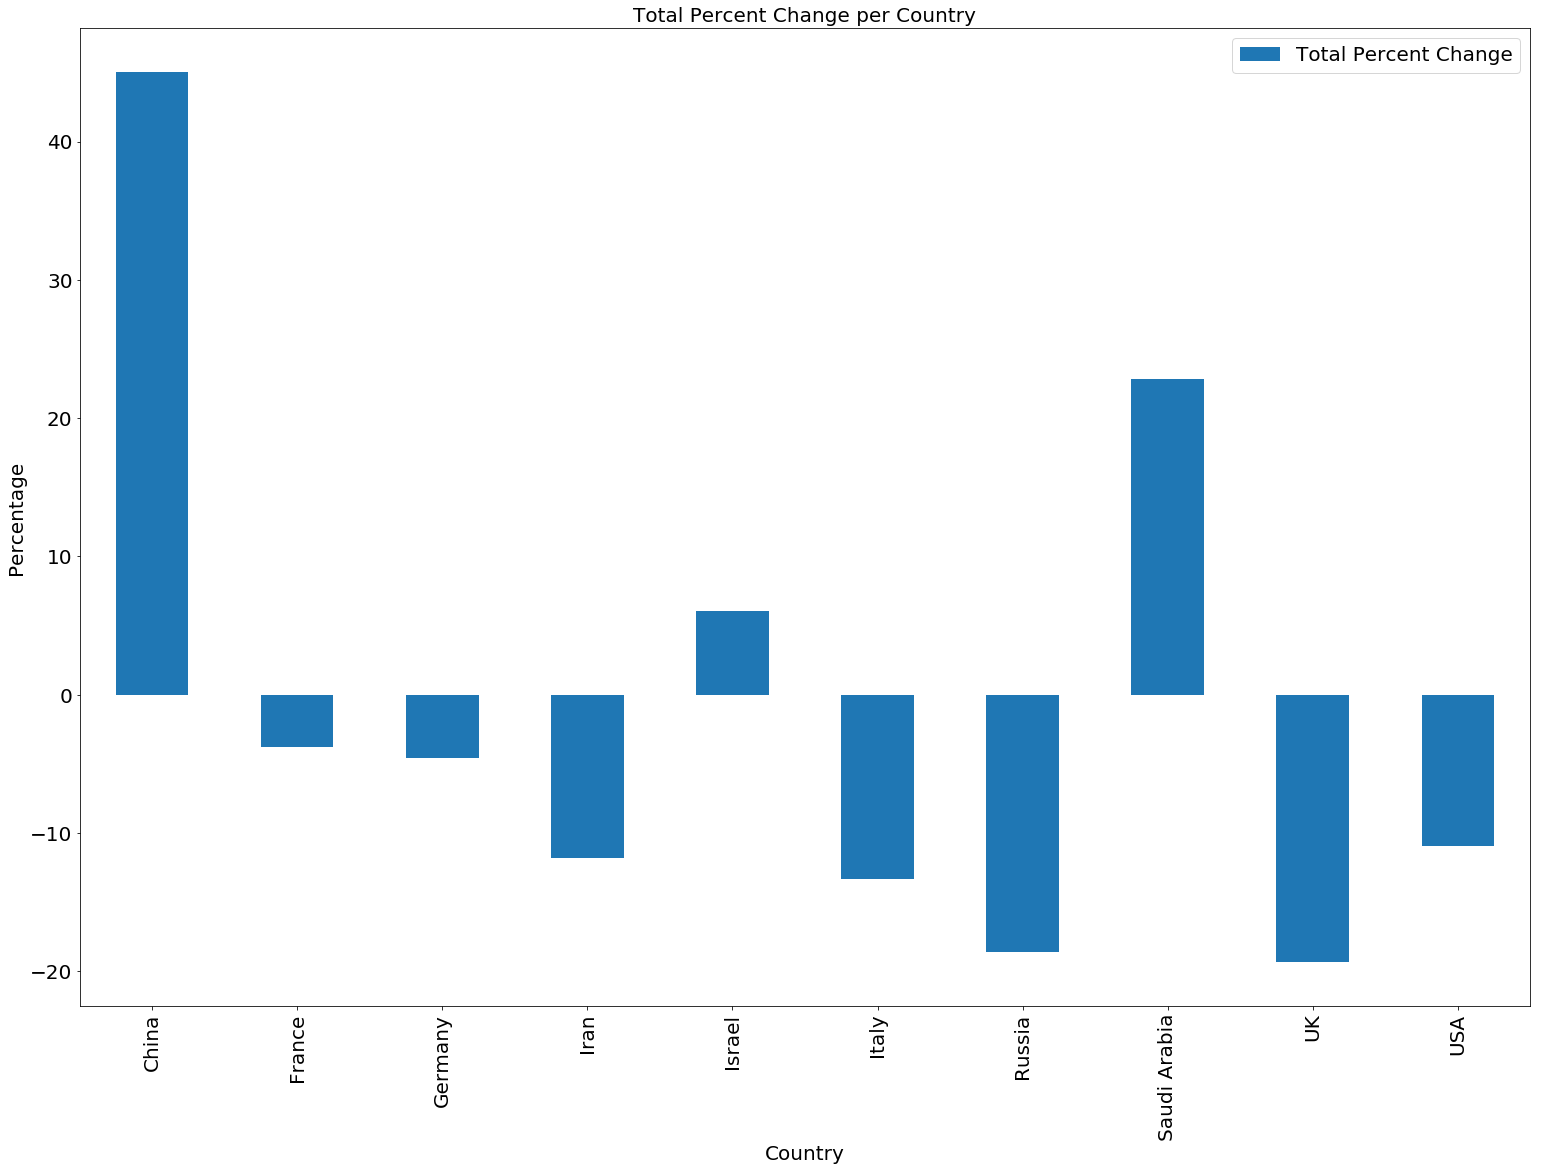

In [45]:
#Plot the total difference
Militaryspendingpcttot.plot(kind='bar')
plt.ylabel('Percentage', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Total Percent Change per Country', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(loc=1, prop={'size': 20})
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 16
plt.show()